In [1]:
import numpy as np

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [2]:
X_train = np.arange(0.0, 1.0, 0.1)
y_train = np.exp(np.sin(10*X_train))
X_train = X_train.reshape(-1, 1)

X_test = np.arange(0.01, 1.0, 0.01)
y_test = np.exp(np.sin(10*X_test))
X_test = X_test.reshape(-1, 1)


In [3]:


from squlearn import Executor
from squlearn.qelm import QELMRegressor

from squlearn.encoding_circuit import ChebyshevPQC, HubregtsenEncodingCircuit, ChebyshevTower

In [4]:
pqc = ChebyshevTower(4,1,num_chebyshev=2,num_layers=5)

exec = Executor()

qelm  = QELMRegressor(pqc,executor=exec, ml_model='linear',# ml_model_options={"hidden_layer_sizes":(10,), "activation":"tanh"},
                      operators = "random_paulis",
                      num_operators=20, parameter_seed=1234)

In [5]:
qelm.used_operators

[SparsePauliOp(['ZZ'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['IZ'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['XI'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['XX'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['YI'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['ZY'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['YZ'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['YY'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['YZ'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['YY'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['YX'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['IY'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['ZX'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['XY'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['YY'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['IZ'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['ZI'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['YX'],
               coeffs=[1.

In [6]:
qelm.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model
y_pred = qelm.predict(X_test)

Mean Squared Error: 1077.1142333000082
R^2 Score: -1629.3035793286076


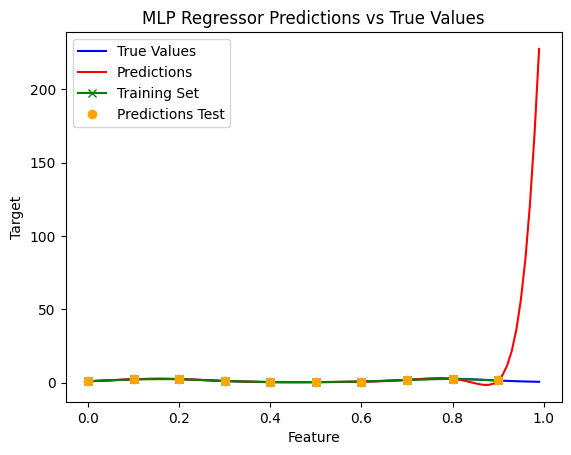

In [7]:
# Step 6: Print the results
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Step 7: Plot the predictions against the true values
plt.plot(X_test, y_test,'-', color='blue', label='True Values')
plt.plot(X_test, y_pred,'-', color='red', label='Predictions')
plt.plot(X_train, y_train, '-x',color='green', label='Training Set')
plt.plot(X_train, qelm.predict(X_train),'o', color='orange', label='Predictions Test')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('MLP Regressor Predictions vs True Values')
plt.legend()
plt.show()

Mean Squared Error: 0.6710861079190568
R^2 Score: -0.015745637699145165


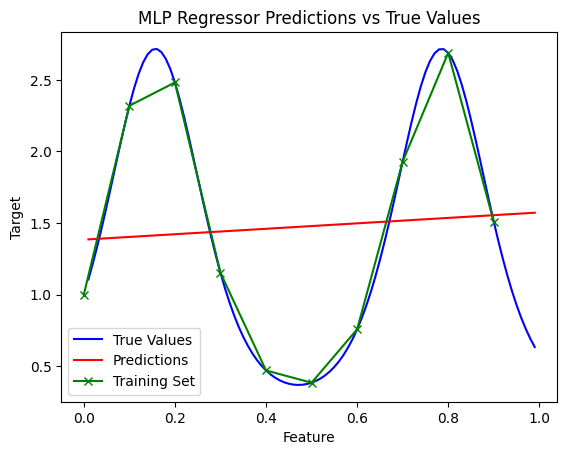

In [8]:
ml_model_options = {"hidden_layer_sizes":(5,5,2,),"activation":'tanh',"random_state":42,"learning_rate_init":0.01,
                                         "max_iter":1000,"solver":'adam', "random_state":4}
ml = MLPRegressor(**ml_model_options)

ml = LinearRegression()

ml.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model
y_pred = ml.predict(X_test)

# Step 6: Print the results
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Step 7: Plot the predictions against the true values
plt.plot(X_test, y_test,'-', color='blue', label='True Values')
plt.plot(X_test, y_pred,'-', color='red', label='Predictions')
plt.plot(X_train, y_train, '-x',color='green', label='Training Set')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('MLP Regressor Predictions vs True Values')
plt.legend()
plt.show()